In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
from acquire_codeup_blog import get_blog_posts
import prepare

In [2]:
from typing import List
import unicodedata
import re
import json

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

In [18]:
df = get_blog_posts()

In [19]:
df.head()

,Unnamed: 0,body,title
0,0,\nThe rumors are true! The time has arrived. C...,Codeup’s Data Science Career Accelerator is He...
1,1,\nBy Dimitri Antoniou and Maggie Giust\nData S...,Data Science Myths - Codeup
2,2,"\nBy Dimitri Antoniou\nA week ago, Codeup laun...",Data Science VS Data Analytics: What’s The Dif...
3,3,\n10 Tips to Crush It at the SA Tech Job Fair\...,10 Tips to Crush It at the SA Tech Job Fair - ...
4,4,\nCompetitor Bootcamps Are Closing. Is the Mod...,Competitor Bootcamps Are Closing. Is the Model...


In [47]:
clean_df = prepare.prep_blog_posts()

In [48]:
clean_df.drop(columns = 'Unnamed: 0', inplace = True)
clean_df.head()

,title,original,stemmed,lemmatized,clean
0,Codeup’s Data Science Career Accelerator is He...,\nThe rumors are true! The time has arrived. C...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumors true time arrived codeup officially ope...
1,Data Science Myths - Codeup,\nBy Dimitri Antoniou and Maggie Giust\nData S...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"\nBy Dimitri Antoniou\nA week ago, Codeup laun...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,\n10 Tips to Crush It at the SA Tech Job Fair\...,10 tip to crush it at the sa tech job fair sa ...,10 tip to crush it at the sa tech job fair sa ...,10 tips crush sa tech job fair sa tech job fai...
4,Competitor Bootcamps Are Closing. Is the Model...,\nCompetitor Bootcamps Are Closing. Is the Mod...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


In [49]:
freq = pd.Series(" ".join(clean_df.clean).split()).value_counts()

In [50]:
freq = freq.drop(index = '&#9;')

Text(0.5, 1.0, '10 most common words in Codeup blog')

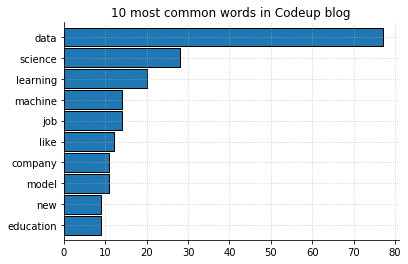

In [51]:
freq.sort_values().tail(10).plot.barh(width=.9)
plt.title('10 most common words in Codeup blog')

In [52]:
redo = " ".join(clean_df.clean)

In [57]:
redo

"rumors true time arrived codeup officially opened applications new data science career accelerator 25 seats available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution hit san antonio resulting explosion data scientist positions across companies like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demands industry program 18 weeks long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust worked heb capital group rackspace along input dozens practitioners hiring partners students work real data sets realistic problems entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate 

In [53]:
def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [55]:
whole = clean(redo)

In [56]:
whole

['rumor',
 'true',
 'time',
 'arrived',
 'codeup',
 'officially',
 'opened',
 'application',
 'new',
 'data',
 'science',
 'career',
 'accelerator',
 '25',
 'seat',
 'available',
 'immersive',
 'program',
 'one',
 'kind',
 'san',
 'antonio',
 'help',
 'land',
 'job',
 'glassdoors',
 '1',
 'best',
 'job',
 'america',
 'data',
 'science',
 'method',
 'providing',
 'actionable',
 'intelligence',
 'data',
 'data',
 'revolution',
 'hit',
 'san',
 'antonio',
 'resulting',
 'explosion',
 'data',
 'scientist',
 'position',
 'across',
 'company',
 'like',
 'usaa',
 'accenture',
 'booz',
 'allen',
 'hamilton',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'cybersecurity',
 'center',
 'school',
 'data',
 'science',
 'built',
 'program',
 'specifically',
 'meet',
 'growing',
 'demand',
 'industry',
 'program',
 '18',
 'week',
 'long',
 'fulltime',
 'handson',
 'projectbased',
 'curriculum',
 'development',
 'instruction',
 'led',
 'senior',
 'data',
 'scientist',
 'maggie',
 'gius

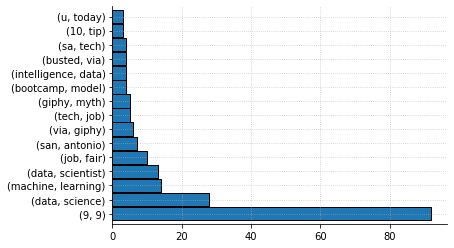

In [43]:
pd.Series(nltk.bigrams(whole)).value_counts().head(15).plot.barh(width=.95)

(-0.5, 1199.5, 799.5, -0.5)

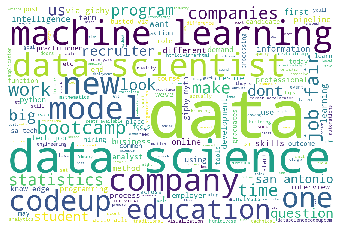

In [58]:
from wordcloud import WordCloud

# wordcloud create image object
# random_state fix the color so it won't change everytime we rerun the code
img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(redo)

# if no plt.imshow(img), the image won't showup
plt.imshow(img)

# if no axis("off"), there will be auto created gridline underneath the cloud
plt.axis("off")

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [61]:
# use lambda to assign "input" string into vedar for sentiment analysis
# sia.polarity_scores(input) 
clean_df["vader_sentiment"] = clean_df.clean.apply(lambda txt: sia.polarity_scores(txt)["compound"])

In [67]:
clean_df

,title,original,stemmed,lemmatized,clean,vader_sentiment
0,Codeup’s Data Science Career Accelerator is He...,\nThe rumors are true! The time has arrived. C...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumors true time arrived codeup officially ope...,0.9790
1,Data Science Myths - Codeup,\nBy Dimitri Antoniou and Maggie Giust\nData S...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,0.9894
2,Data Science VS Data Analytics: What’s The Dif...,"\nBy Dimitri Antoniou\nA week ago, Codeup laun...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,0.9413
3,10 Tips to Crush It at the SA Tech Job Fair - ...,\n10 Tips to Crush It at the SA Tech Job Fair\...,10 tip to crush it at the sa tech job fair sa ...,10 tip to crush it at the sa tech job fair sa ...,10 tips crush sa tech job fair sa tech job fai...,0.9979
4,Competitor Bootcamps Are Closing. Is the Model...,\nCompetitor Bootcamps Are Closing. Is the Mod...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,0.1779


**Sentiment not as positive when talking about competitor closing and if the business model is right?**

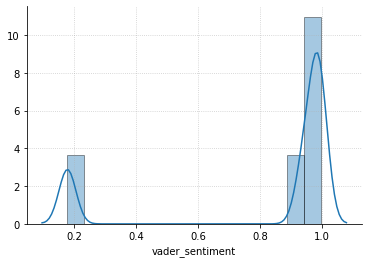

In [65]:
sns.distplot(clean_df.vader_sentiment)

In [69]:
# create analysis object
from afinn import Afinn
sa = Afinn()

In [70]:
clean_df["afinn_sentiment"] = clean_df.clean.apply(sa.score)

In [74]:
clean_df.clean[0].split()

['rumors',
 'true',
 'time',
 'arrived',
 'codeup',
 'officially',
 'opened',
 'applications',
 'new',
 'data',
 'science',
 'career',
 'accelerator',
 '25',
 'seats',
 'available',
 'immersive',
 'program',
 'one',
 'kind',
 'san',
 'antonio',
 'help',
 'land',
 'job',
 'glassdoors',
 '1',
 'best',
 'job',
 'america',
 'data',
 'science',
 'method',
 'providing',
 'actionable',
 'intelligence',
 'data',
 'data',
 'revolution',
 'hit',
 'san',
 'antonio',
 'resulting',
 'explosion',
 'data',
 'scientist',
 'positions',
 'across',
 'companies',
 'like',
 'usaa',
 'accenture',
 'booz',
 'allen',
 'hamilton',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'cybersecurity',
 'center',
 'school',
 'data',
 'science',
 'built',
 'program',
 'specifically',
 'meet',
 'growing',
 'demands',
 'industry',
 'program',
 '18',
 'weeks',
 'long',
 'fulltime',
 'handson',
 'projectbased',
 'curriculum',
 'development',
 'instruction',
 'led',
 'senior',
 'data',
 'scientist',
 'maggie'